# Using APIs and Intro to Machine Learning
#### Connor Leggett

## Using an API

In [2]:
# Importing necessary libraries
import urllib
import requests
import time

### Generating random jeopardy questions

In [24]:
# A function to Display information from a question Dictionary:
def display_question(question):
    print("Category: " + question["category"]["title"])
    print("Q: " + question["question"])
    time.sleep(7)
    print("A: " + question["answer"])


# The URL of the API I will be making requests to:
url = "http://jservice.io/api/random"

# Making the URL Request
random_question = requests.get(url).json()[0]

# Displaying Question
display_question(random_question)



Category: buddhism's eightfold path
Q: In a 1999 film they were "Cruel"; for Buddhists they should be right
A: intentions


### Finding Song Lyrics

In [16]:
# Base URL:
base_url = "https://api.lyrics.ovh/v1/"

# User's input
title = input("Title: ")
artist = input("Artist: ")

# Create a new url based on users requests:
final_url = base_url + artist + '/' + title

data = requests.get(final_url).json()

# Making sure the API returned a value
try:
    print("\n\n" + data['lyrics'])
except KeyError:
    print("Song not found")

# For requests with optional arguments, look up: urllib.parse.urlencode()

Title: "hello"
Artist: "adele"


Paroles de la chanson Hello par Adele
Hello, it’s me 


I was wondering 


If after all these years 


You’d like to meet 


To go over 


Everything 


They say that time’s supposed to heal yeah but I ain’t done much healing 





Hello, can you hear me? 


I'm in California dreaming about who we used to be 


When we were younger and free 


I've forgotten how it felt before the world fell at our feet 


There's such a difference between us 






And a million miles 





Hello from the other side 


I must've called a thousand times to tell you 


I'm sorry, for everything that I've done 


But when I call you never seem to be home 





Hello from the outside 


At least I can say that I've tried to tell you 


I'm sorry, for breaking your heart 


But it don't matter, it clearly doesn't tear you apart anymore 





Hello, how are you? 


It's so typical of me to talk about myself 


I'm sorry, I hope that you're well 












Did you ever make

## Data Science

In [2]:
# Necessary imports:
import json
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import random
import os

# Setting up current directory:
CURRENT_DIRECTORY = os.getcwd()

### K Means Clustering 

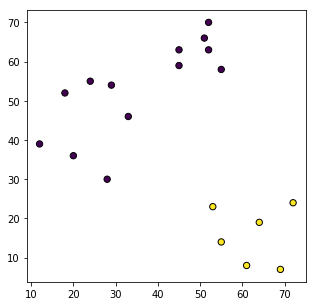

In [5]:
# Creating a pandas dataframe
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

# Alternatively, use random datasets
"""
rands1 = [random.randint(0,100) for i in range(100)]
rands2 = [random.randint(0,100) for i in range(100)]
df = pd.DataFrame({
    'x': rands1,
    'y': rands2
})
"""

# Using the sklearn KMeans algorithm to group data
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

# Accessing the central points of each group 
centroids = kmeans.cluster_centers_

# Accessing the labels of each point
labels = kmeans.labels_


# Plotting the results below
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['x'], df['y'], c=labels.astype(np.float), edgecolor='k', s=40)

    



### K Nearest Neighbors

In [11]:
# Importing data from a csv file
dataset = pd.read_csv(CURRENT_DIRECTORY + '/iris_data.csv')
dataset['Id'] = range(150)

# Ways to visualize the data:
rows, cols = dataset.shape
#dataset.describe()

# Grouping Data By Species
dataset.groupby('Species').size()

# splitting up the labels and the values for each species:
feature_columns = ['SepalLength', 'SepalWidth', 'PetalLength','PetalWidth']
X = dataset[feature_columns].values
Y = dataset['Species'].values

# Encoding Labels (Turning string species names into integers)
# setosa -> 0
# versicolor -> 1
# virginica -> 2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

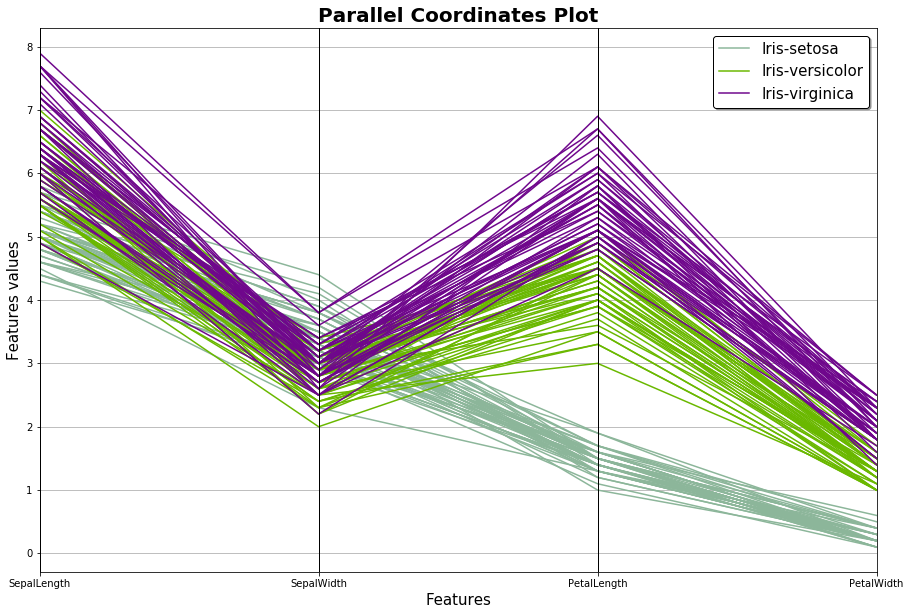

In [12]:
# Data Visualization:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [13]:
# Training the model:

# Splitting into training and test datasets:
# from sklearn.model_selection import cross_validation as cross
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Creating the learning model
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model with the training data
knn_classifier.fit(X_train, Y_train)

# Making predictions with the test data
Y_pred = knn_classifier.predict(X_test)

# Finding Accuracy:
accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy of model: ' + str(round(accuracy, 2)) + ' %.')

Accuracy of model: 97.78 %.


<Figure size 432x288 with 0 Axes>

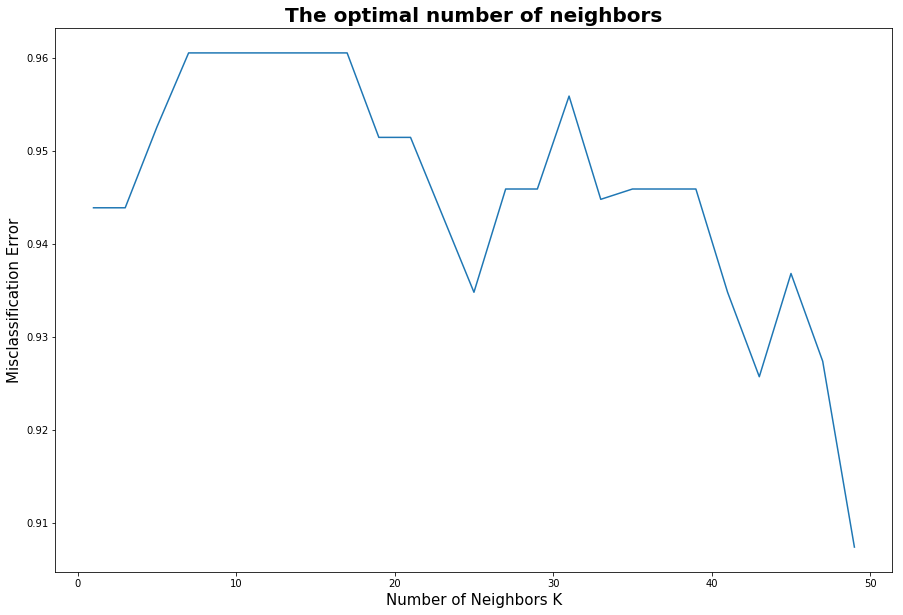

In [14]:
# Testing out different k values

# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())



# Displaying results visually
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
plt.plot(k_list, cv_scores)

plt.show()

## Citations

@inproceedings{sklearn_api,
  author    = {Lars Buitinck and Gilles Louppe and Mathieu Blondel and
               Fabian Pedregosa and Andreas Mueller and Olivier Grisel and
               Vlad Niculae and Peter Prettenhofer and Alexandre Gramfort
               and Jaques Grobler and Robert Layton and Jake VanderPlas and
               Arnaud Joly and Brian Holt and Ga{\"{e}}l Varoquaux},
  title     = {{API} design for machine learning software: experiences from the scikit-learn
               project},
  booktitle = {ECML PKDD Workshop: Languages for Data Mining and Machine Learning},
  year      = {2013},
  pages = {108--122},
}

#### Inspiration for this project came from a similar instructive project created by Johnny Berman and Jeffery He that can be found here: github.com/JohnnyBerman/HCS-Data-Science-Bootcamp

#### Code for KNN iris project adapted from SkalskiP. Orginial found here: https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification

#### Iris dataset: https://www.kaggle.com/uciml/iris